In [1]:
%matplotlib inline
from allensdk.core.cell_types_cache import CellTypesCache
import matplotlib as mpl # I don't think I'm using this
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import seaborn

In [2]:
#let's start looking at the differences between short square and long square pulses

In [3]:
ss_threshold = np.load('ss_threshold_raw.npy')
ls_threshold = np.load('ls_threshold_raw.npy')

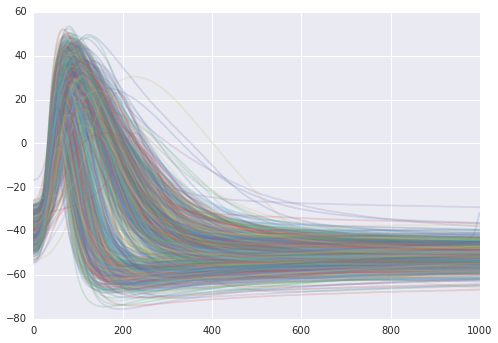

In [17]:
plt.plot(ls_threshold.T,alpha=.2)

In [4]:
Square_dif = np.empty((len(ss_threshold),1000))

In [5]:
Square_dif = ss_threshold - ls_threshold
#normalize all the data
for s in range(len(Square_dif)):
    Square_dif[s] = Square_dif[s] +(-Square_dif[s][0])
data=Square_dif

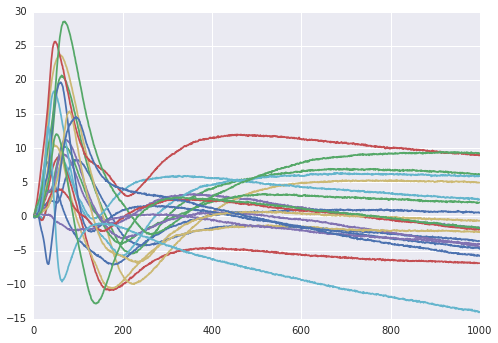

In [63]:
# plot out some traces
r = plt.plot(data[0:200:10,:].T)

In [6]:
# initialized and run decomposition
pca = PCA(10)
pca.fit(data)
decomp = pca.fit_transform(data)
sigma = np.sqrt(pca.explained_variance_)

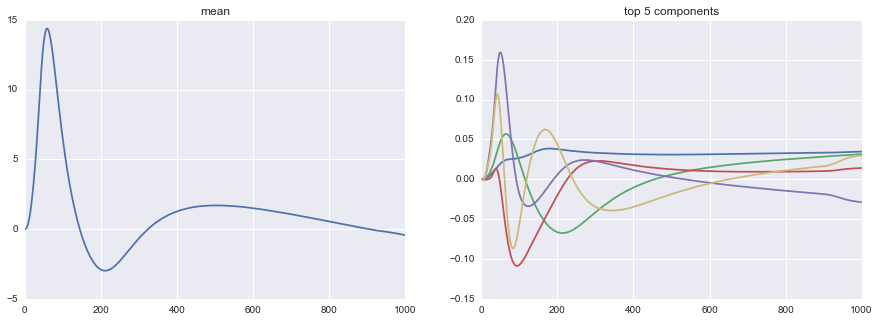

In [7]:
# plot mean and first 5 components
f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('mean')
ax2.set_title('top 5 components')
ax1.plot(pca.mean_)
ax2.plot(pca.components_[0:5].T)

In [1]:
plt.plot(pca.explained_variance_ratio_)
plt.title('Explained Variance')

NameError: name 'plt' is not defined

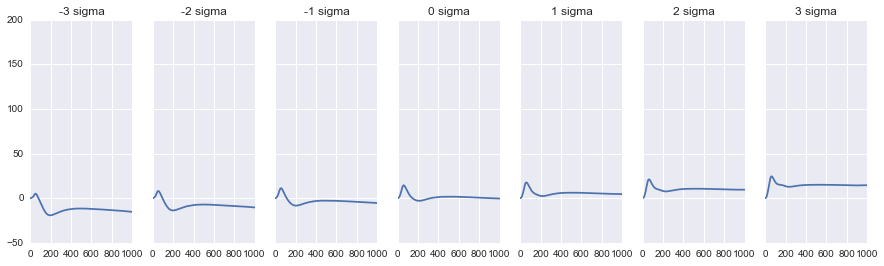

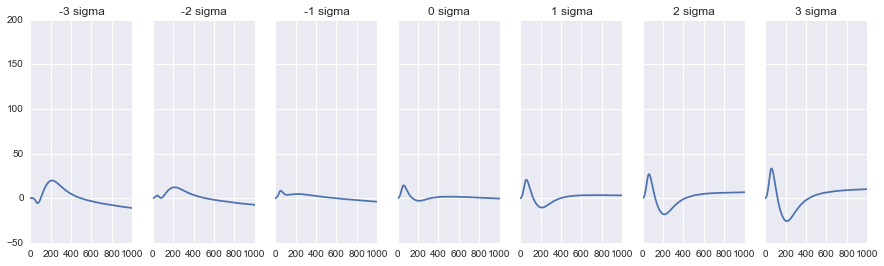

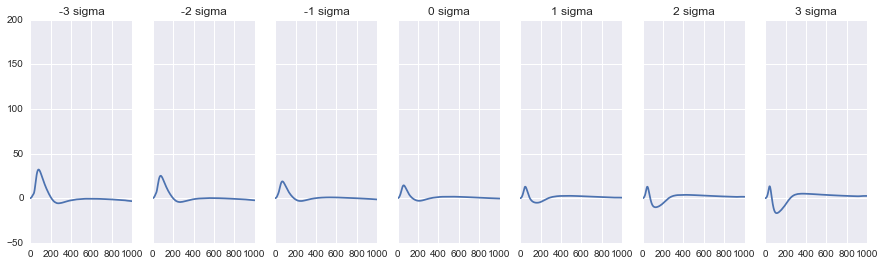

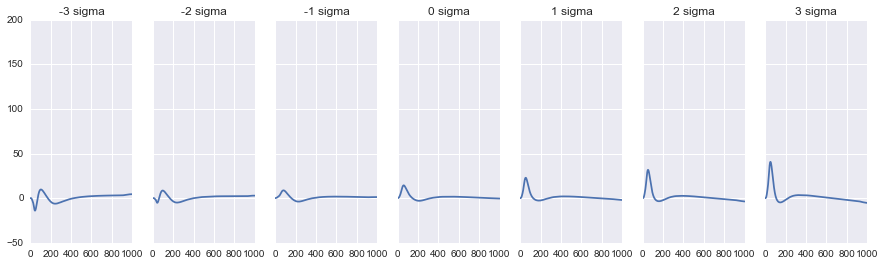

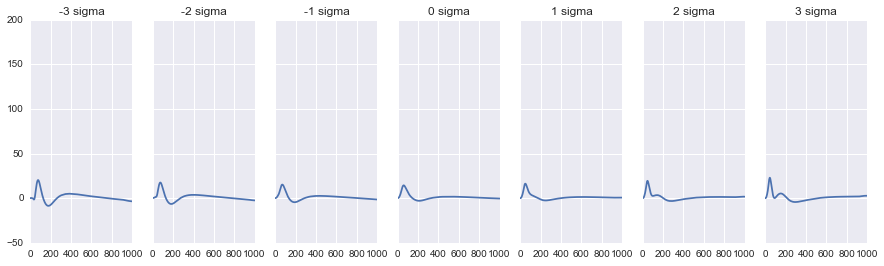

In [9]:
for c in range(5):
    f,ax = plt.subplots(1,7,sharey=True,figsize=(15,4))
    for idx, s in enumerate(range(-3,4)) :
        ax[idx].plot(pca.mean_ + s*sigma[c]*pca.components_[c])
        ax[idx].set_title('%d sigma' % s)
        #ax[idx].set_xlim(0,2600)
        ax[idx].set_ylim(-50,200)

In [25]:
cells_df = pd.load('showcase_df.h5')
specimen = []
for i in range(len(cells_df)):
    if cells_df['ss_threshold'][i] != None and cells_df['ls_threshold'][i] != None and cells_df['ramp_threshold_sweep'][i] != None:
        specimen.append(cells_df['specimen_id'][i])

In [32]:
PCA_df = pd.DataFrame(specimen,columns = ['specimen'])

In [2]:
# add top pca components to the cells dataframe
ncomp = 10
for c in range(ncomp):
    PCA_df['ephys_ss_ls_%02d' % c] = np.nan
    
start_label = 'ephys_ss_ls_%02d' % 0
end_label = 'ephys_ss_ls_%02d' % (ncomp-1)

NameError: name 'np' is not defined

In [54]:
PCA_df.head()

,specimen,ephys_ss_ls_00,ephys_ss_ls_01,ephys_ss_ls_02,ephys_ss_ls_03,ephys_ss_ls_04,ephys_ss_ls_05,ephys_ss_ls_06,ephys_ss_ls_07,ephys_ss_ls_08,ephys_ss_ls_09
0,464212183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,464198958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,313862373,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,464326041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,313861608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
exp_lookup = [e[0]for e in PCA_df.iterrows()]
#trace_df = pd.load('cells_dataframe.h5')

In [110]:
for c in range(ncomp):
    print PCA_df['ephys_ss_ls_%02d' % c][0]
    

nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


In [107]:
for e in PCA_df:

    #print idx
    print e
    #PCA_df[start_label:end_label] = np.divide(decomp[0:ncomp],sigma[0:ncomp])

specimen
ephys_ss_ls_00
ephys_ss_ls_01
ephys_ss_ls_02
ephys_ss_ls_03
ephys_ss_ls_04
ephys_ss_ls_05
ephys_ss_ls_06
ephys_ss_ls_07
ephys_ss_ls_08
ephys_ss_ls_09


In [45]:
np.shape(np.divide(decomp[0:10],sigma[0:10]))

(10L, 10L)